In [7]:
import pandas as pd

data = pd.read_csv('forestfires.csv')
print(data.head())
print(data.info()) 

   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null

In [8]:
print(data.isnull().sum())

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


In [9]:
data = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)


In [10]:
X = data.drop(['area'], axis=1)  # Features
y = data['area']                # Target


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [13]:
dt_predictions = dt_model.predict(X_test)


In [14]:
from sklearn.metrics import mean_squared_error, r2_score

dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}, R2 Score: {dt_r2}")


Decision Tree MSE: 13858.698512499996, R2 Score: -0.17568528874123523


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [16]:
rf_predictions = rf_model.predict(X_test)


NameError: name 'rf_model' is not defined

In [18]:
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}, R2 Score: {rf_r2}")


Random Forest MSE: 11955.85690856404, R2 Score: -0.014260110284941785


In [12]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)


SVR()

In [13]:
svm_predictions = svm_model.predict(X_test)


In [19]:
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
print(f"SVM MSE: {svm_mse}, R2 Score: {svm_r2}")


SVM MSE: 12146.12077719308, R2 Score: -0.03040090670420148


In [15]:
models = ['Decision Tree', 'Random Forest', 'SVM']
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

for i, model in enumerate(models):
    print(f"{model}: MSE = {mse_scores[i]}, R2 Score = {r2_scores[i]}")


NameError: name 'dt_mse' is not defined

In [16]:
models = ['Decision Tree', 'Random Forest', 'SVM']
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

for i, model in enumerate(models):
    print(f"{model}: MSE = {mse_scores[i]}, R2 Score = {r2_scores[i]}")


NameError: name 'dt_mse' is not defined

In [20]:
models = ['Decision Tree', 'Random Forest', 'SVM']
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

for i, model in enumerate(models):
    print(f"{model}: MSE = {mse_scores[i]}, R2 Score = {r2_scores[i]}")


Decision Tree: MSE = 13858.698512499996, R2 Score = -0.17568528874123523
Random Forest: MSE = 11955.85690856404, R2 Score = -0.014260110284941785
SVM: MSE = 12146.12077719308, R2 Score = -0.03040090670420148


In [21]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


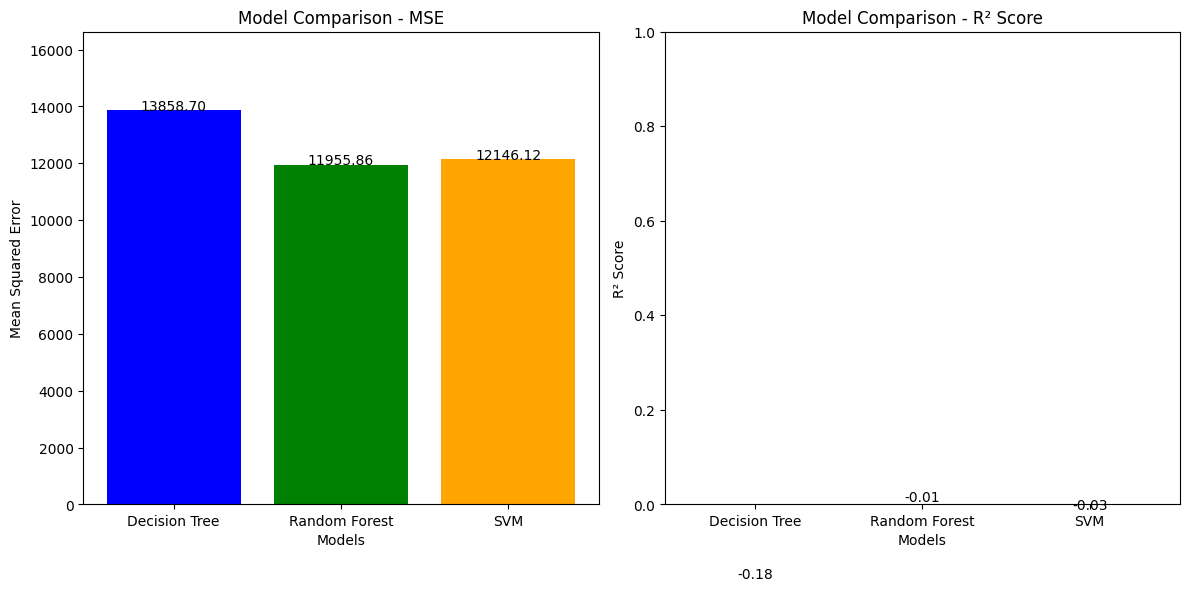

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Model Names
models = ['Decision Tree', 'Random Forest', 'SVM']

# Example MSE and R² Scores (replace these with your calculated values)
mse_scores = [dt_mse, rf_mse, svm_mse]
r2_scores = [dt_r2, rf_r2, svm_r2]

# Plot MSE
plt.figure(figsize=(12, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'orange'])
plt.title("Model Comparison - MSE")
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.ylim([0, max(mse_scores) * 1.2])
for i, v in enumerate(mse_scores):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

# Bar plot for R² Score
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color=['blue', 'green', 'orange'])
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.ylim([0, 1])
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

# Show the plots
plt.tight_layout()
plt.show()


In [1]:
import joblib

joblib.dump(rf_model, 'best_forest_fire_model.joblib')


NameError: name 'rf_model' is not defined

In [2]:
import joblib

joblib.dump(models, 'best_forest_fire_model.joblib')


NameError: name 'models' is not defined

In [9]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [17]:
rf_predictions = rf_model.predict(X_test)


NameError: name 'rf_model' is not defined